In [1]:
# 수학 함수 패키지
import math

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.formula.api import *
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_iris = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\iris.csv',
                      index_col = 'Unnamed: 0')
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
# 목표변수와 나머지 변수들을 따로 저장
x = df_iris.iloc[: , 0:4 ]
y = df_iris.iloc[:, 4 ]

In [5]:
knn = KNeighborsClassifier(n_neighbors=4)

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-08-31 21:47:42] Features: 1/3 -- score: 0.96[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-08-31 21:47:43] Features: 2/3 -- score: 0.9733333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-08-31 21:47:43] Features: 3/3 -- score: 0.9733333333333334

In [6]:
sfs1.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.96]),
  'avg_score': 0.96,
  'feature_names': ('Petal.Width',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('Petal.Length', 'Petal.Width')},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('Sepal.Width', 'Petal.Length', 'Petal.Width')}}

In [7]:
sfs1.k_feature_idx_

(1, 2, 3)

In [8]:
sfs1.k_feature_names_

('Sepal.Width', 'Petal.Length', 'Petal.Width')

In [9]:
sfs1.k_score_

0.9733333333333334

In [10]:
# Sequential Forward Selection
sfs = SFS(knn, 
          k_features=3, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sfs = sfs.fit(x, y)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)

###################################################

# Sequential Backward Selection
sbs = SFS(knn, 
          k_features=3, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sbs = sbs.fit(x, y)

print('\nSequential Backward Selection (k=3):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)

###################################################

# Sequential Forward Floating Selection
sffs = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sffs = sffs.fit(x, y)

print('\nSequential Forward Floating Selection (k=3):')
print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)

###################################################

# Sequential Backward Floating Selection
sbfs = SFS(knn, 
           k_features=3, 
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sbfs = sbfs.fit(x, y)

print('\nSequential Backward Floating Selection (k=3):')
print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)


Sequential Forward Selection (k=3):
(1, 2, 3)
CV Score:
0.9731507823613088

Sequential Backward Selection (k=3):
(1, 2, 3)
CV Score:
0.9731507823613088

Sequential Forward Floating Selection (k=3):
(1, 2, 3)
CV Score:
0.9731507823613088

Sequential Backward Floating Selection (k=3):
(1, 2, 3)
CV Score:
0.9731507823613088


In [11]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.9736842105263158, 0.9473684210526315, 0.891...",0.953236,"(Petal.Width,)",0.064132,0.040008,0.023099
2,"(2, 3)","[0.9736842105263158, 0.9473684210526315, 0.918...",0.959993,"(Petal.Length, Petal.Width)",0.048319,0.030143,0.017403
3,"(1, 2, 3)","[0.9736842105263158, 1.0, 0.9459459459459459, ...",0.973151,"(Sepal.Width, Petal.Length, Petal.Width)",0.030639,0.019113,0.011035


In [12]:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)","[0.9736842105263158, 0.9473684210526315, 0.918...",0.953236,"(Sepal.Length, Sepal.Width, Petal.Length, Peta...",0.03602,0.022471,0.012974
3,"(1, 2, 3)","[0.9736842105263158, 1.0, 0.9459459459459459, ...",0.973151,"(Sepal.Width, Petal.Length, Petal.Width)",0.030639,0.019113,0.011035


In [13]:
pd.DataFrame.from_dict(sffs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.9736842105263158, 0.9473684210526315, 0.891...",0.953236,"(Petal.Width,)",0.064132,0.040008,0.023099
2,"(2, 3)","[0.9736842105263158, 0.9473684210526315, 0.918...",0.959993,"(Petal.Length, Petal.Width)",0.048319,0.030143,0.017403
3,"(1, 2, 3)","[0.9736842105263158, 1.0, 0.9459459459459459, ...",0.973151,"(Sepal.Width, Petal.Length, Petal.Width)",0.030639,0.019113,0.011035


In [14]:
pd.DataFrame.from_dict(sbfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)","[0.9736842105263158, 0.9473684210526315, 0.918...",0.953236,"(Sepal.Length, Sepal.Width, Petal.Length, Peta...",0.03602,0.022471,0.012974
3,"(1, 2, 3)","[0.9736842105263158, 1.0, 0.9459459459459459, ...",0.973151,"(Sepal.Width, Petal.Length, Petal.Width)",0.030639,0.019113,0.011035


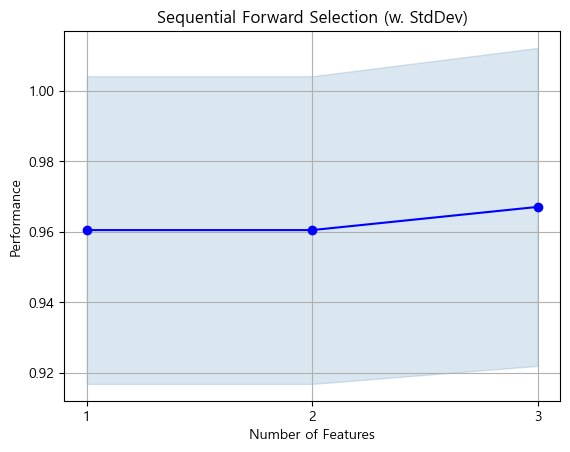

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[1.0, 0.9473684210526315, 1.0, 0.8947368421052...",0.960526,"(Petal.Width,)",0.038036,0.04364,0.016494
2,"(2, 3)","[1.0, 0.9473684210526315, 1.0, 0.8947368421052...",0.960526,"(Petal.Length, Petal.Width)",0.038036,0.04364,0.016494
3,"(0, 2, 3)","[1.0, 0.9473684210526315, 1.0, 0.8947368421052...",0.967105,"(Sepal.Length, Petal.Length, Petal.Width)",0.039311,0.045103,0.017047


In [15]:

sffs = SFS( knn,
            k_features=3,  # 변수의 개수 선택
            forward=True, floating=True,  # 단계적 선택법을 하되 Top Down 방향으로...
            scoring='accuracy',  # 선택 기준은 R-square
            cv = 8,  # 교차검증은 8-fold
            n_jobs=-1 )  # 연산할 때 모든 CPU 코어 사용

sffs.fit(x,y)

fig = plot_sfs(sffs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

pd.DataFrame.from_dict(sffs.get_metric_dict()).T